In [ ]:
#WORK DATA FOR THE ROADS
#if there are works for 2 months on a street in Barcelona then there will certainly be no parking available there in those 2 months
#https://opendata-ajuntament.barcelona.cat/data/en/dataset/est-cadastre-edificacions-any-const

In [ ]:
#for example year 2024

In [3]:
df_constructions_2024 = pd.read_csv('2024_edificacions_any_con.csv')
df_constructions_2024

,Any,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Seccio_censal,Any_construccio,Nombre
0,2024,1,Ciutat Vella,1,el Raval,1,<1901,31
1,2024,1,Ciutat Vella,1,el Raval,2,<1901,58
2,2024,1,Ciutat Vella,1,el Raval,3,<1901,38
3,2024,1,Ciutat Vella,1,el Raval,4,<1901,67
4,2024,1,Ciutat Vella,1,el Raval,5,<1901,90
...,...,...,...,...,...,...,...,...
8262,2024,10,Sant Martí,71,Provençals del Poblenou,94,2021-2030,11
8263,2024,10,Sant Martí,71,Provençals del Poblenou,100,2021-2030,4
8264,2024,10,Sant Martí,71,Provençals del Poblenou,101,2021-2030,8
8265,2024,10,Sant Martí,72,Sant Martí de Provençals,110,2021-2030,1


This dataset provides information on the number of cadastral buildings in the city of Barcelona, divided by year of construction. 

- Any: Year of the data.
- Codi_districte: District code.
- Nom_districte: Name of the district.
- Codi_barri: Neighborhood code.
- Nom_barri: Name of the neighborhood.
- Seccio_censal: Census section.
- Any_construccio: Year of construction of the cadastral buildings.
- Nombre: Number of cadastral buildings constructed in the specified year.

Therefore, each row of this dataset represents the number of cadastral buildings built in a specific year, within a specific neighborhood and district of Barcelona. This information can be used to analyze the distribution of buildings over time and space within the city.

In [ ]:
# merge all the data available from 2018 to 2024

In [59]:
file_names = ['2018_edificacions_any_con.csv', '2019_edificacions_any_con.csv', 
              '2020_edificacions_any_con.csv', '2021_edificacions_any_con.csv', 
              '2022_edificacions_any_con.csv', '2023_edificacions_any_con.csv', 
              '2024_edificacions_any_con.csv']

dfs_constructions = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    # Rimuovi le righe con 'NC' nella colonna 'Codi_districte'
    df = df[df['Codi_districte'] != 'NC']
    # Rimuovi le righe con 'NC' nella colonna 'Codi_barri'
    df = df[df['Codi_barri'] != 'NC']
    # Converti le colonne Codi_districte e Codi_barri in interi
    df['Codi_districte'] = df['Codi_districte'].astype(int)
    df['Codi_barri'] = df['Codi_barri'].astype(int)
    dfs_constructions.append(df)

df_constructions = pd.concat(dfs_constructions, ignore_index=True)

In [60]:
df_constructions

,Any,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Seccio_censal,Any_construccio,Nombre
0,2018,1,Ciutat Vella,1,el Raval,1,Abans de 1901,31
1,2018,1,Ciutat Vella,1,el Raval,1,1901 - 1940,10
2,2018,1,Ciutat Vella,1,el Raval,1,1941 - 1950,10
3,2018,1,Ciutat Vella,1,el Raval,1,1951 - 1960,3
4,2018,1,Ciutat Vella,1,el Raval,1,1961 - 1970,4
...,...,...,...,...,...,...,...,...
59028,2024,10,Sant Martí,71,Provençals del Poblenou,94,2021-2030,11
59029,2024,10,Sant Martí,71,Provençals del Poblenou,100,2021-2030,4
59030,2024,10,Sant Martí,71,Provençals del Poblenou,101,2021-2030,8
59031,2024,10,Sant Martí,72,Sant Martí de Provençals,110,2021-2030,1


In [98]:
df_constructions.to_csv('df_constructions.csv', index=False)

In [4]:
df_constructions = pd.read_csv('df_constructions.csv')
df_constructions

,Any,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Seccio_censal,Any_construccio,Nombre
0,2018,1,Ciutat Vella,1,el Raval,1,Abans de 1901,31
1,2018,1,Ciutat Vella,1,el Raval,1,1901 - 1940,10
2,2018,1,Ciutat Vella,1,el Raval,1,1941 - 1950,10
3,2018,1,Ciutat Vella,1,el Raval,1,1951 - 1960,3
4,2018,1,Ciutat Vella,1,el Raval,1,1961 - 1970,4
...,...,...,...,...,...,...,...,...
59028,2024,10,Sant Martí,71,Provençals del Poblenou,94,2021-2030,11
59029,2024,10,Sant Martí,71,Provençals del Poblenou,100,2021-2030,4
59030,2024,10,Sant Martí,71,Provençals del Poblenou,101,2021-2030,8
59031,2024,10,Sant Martí,72,Sant Martí de Provençals,110,2021-2030,1


- Temporal Analysis of Construction Data:  
Examine how the number of constructions changes over time. Identify periods when there may be construction underway that could affect parking availability in certain areas of the city.

- Spatial correlation:  
Analyzes the distribution of buildings with respect to the areas of the city. You may notice concentrations of construction in certain areas, which may indicate areas of high construction activity.

- Identifying Construction Areas:  
Using construction data, identify streets or census tracts where construction is underway or planned. These areas may experience a reduction in parking availability due to temporary parking restrictions or the presence of construction.

- Integrate into your parking prediction model:  
Once you've identified areas affected by construction, incorporate this information into your parking prediction model. For example, you could consider a variable that indicates the presence of construction in a certain area and how this affects the availability of parking.

- Impact assessment:  
Monitor the effect of construction on parking availability over time. You can compare your model's predictions to actual parking availability data to evaluate the accuracy of the predictions and make any adjustments to the model.

By integrating construction data into your parking prediction project, you will be able to provide more accurate and useful predictions for users looking for parking in Barcelona, taking into account variations due to ongoing construction.

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

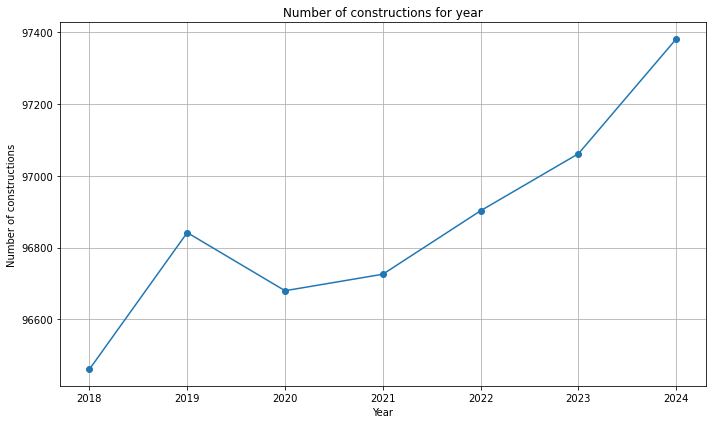

In [7]:
# Group data by year of construction and calculate the total number of constructions for each year
construction_by_year = df_constructions.groupby('Any')['Nombre'].sum()

x_values = np.array(construction_by_year.index)
y_values = np.array(construction_by_year.values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title('Number of constructions for year')
plt.xlabel('Year')
plt.ylabel('Number of constructions')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Identify peak periods
construction_by_year = df_constructions.groupby('Any')['Nombre'].sum().reset_index()
mean_construction = construction_by_year['Nombre'].mean()
peaks = construction_by_year[construction_by_year['Nombre'] > mean_construction]
print("Peak construction periods:")
print(peaks)

Peak construction periods:
    Any  Nombre
4  2022   96903
5  2023   97062
6  2024   97382


In [64]:
len(df_constructions.Nom_districte.unique())

11

In [65]:
len(df_constructions.Nom_barri.unique())

80

In [66]:
len(df_constructions.Nombre.unique())

173

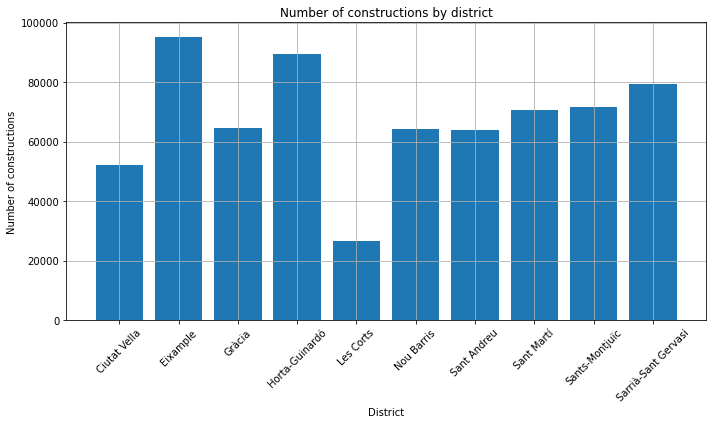

In [9]:
construction_by_district = df_constructions.groupby('Nom_districte')['Nombre'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(construction_by_district['Nom_districte'], construction_by_district['Nombre'])
plt.title('Number of constructions by district')
plt.xlabel('District')
plt.ylabel('Number of constructions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

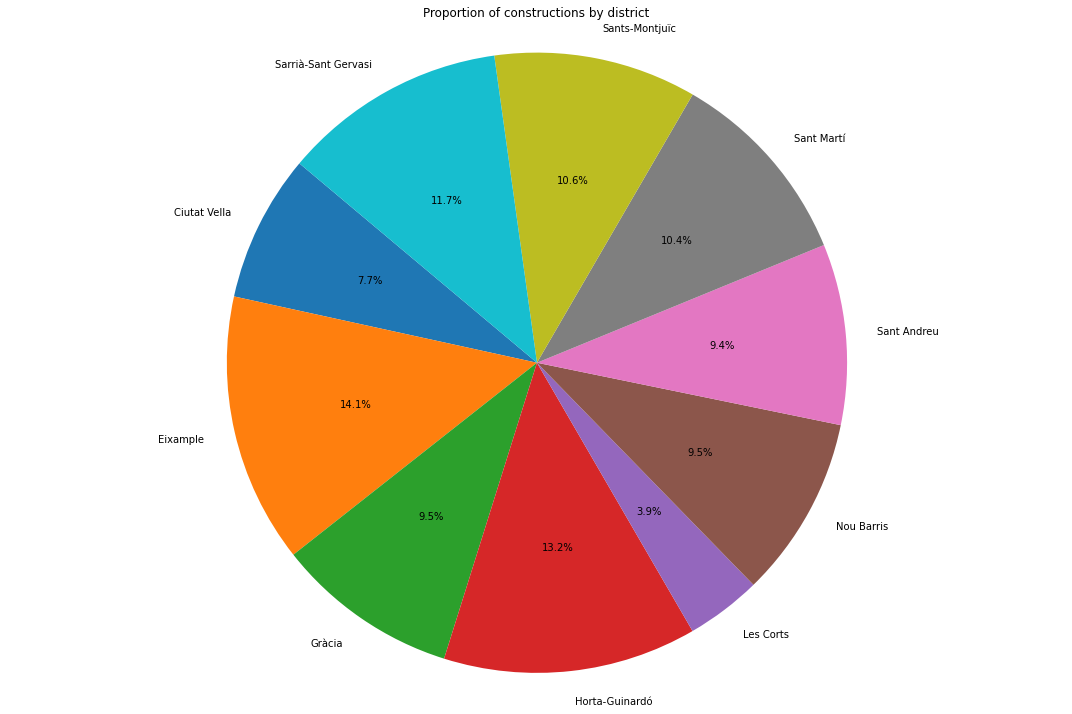

In [10]:
plt.figure(figsize=(15, 10))
plt.pie(construction_by_district['Nombre'], labels=construction_by_district['Nom_districte'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of constructions by district')
plt.axis('equal')
plt.tight_layout()
plt.show()

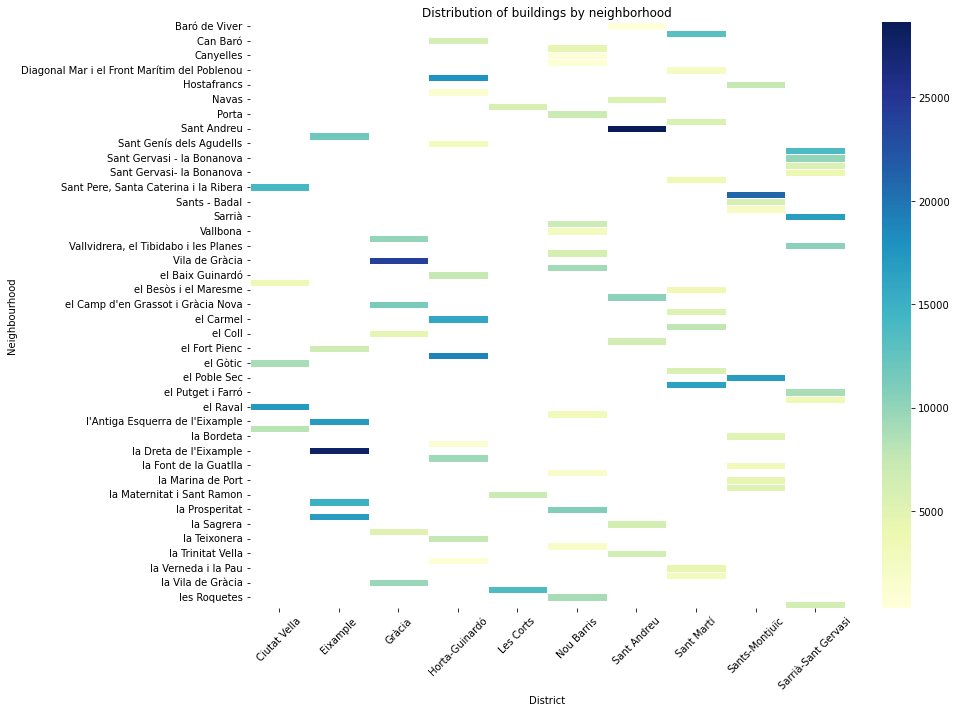

In [11]:
import seaborn as sns

construction_pivot = df_constructions.pivot_table(index='Nom_barri', columns='Nom_districte', values='Nombre', aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.heatmap(construction_pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Distribution of buildings by neighborhood')
plt.xlabel('District')
plt.ylabel('Neighbourhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

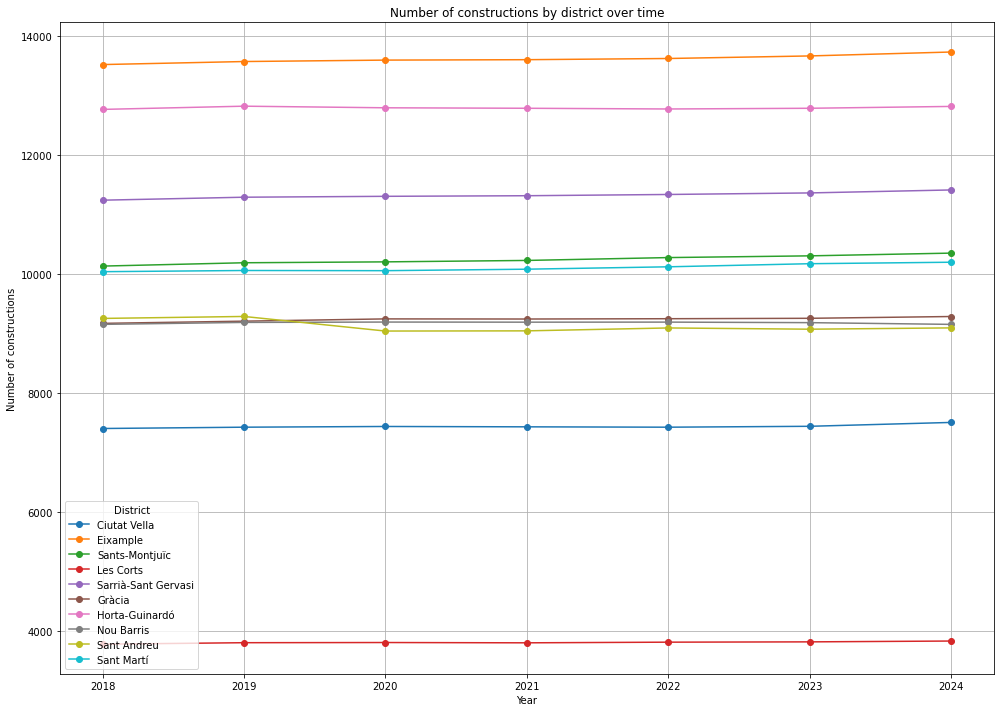

In [12]:
plt.figure(figsize=(14, 10))
for distretto in df_constructions['Nom_districte'].unique():
    distretto_data = df_constructions[df_constructions['Nom_districte'] == distretto]
    construction_by_year = distretto_data.groupby('Any')['Nombre'].sum()
    x_values = np.array(construction_by_year.index)
    y_values = np.array(construction_by_year.values)
    plt.plot(x_values, y_values, label=distretto, marker='o', linestyle='-')

plt.title('Number of constructions by district over time')
plt.xlabel('Year')
plt.ylabel('Number of constructions')
plt.legend(title='District')
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
df_constructions.head(10)

,Any,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Seccio_censal,Any_construccio,Nombre
0,2018,1,Ciutat Vella,1,el Raval,1,Abans de 1901,31
1,2018,1,Ciutat Vella,1,el Raval,1,1901 - 1940,10
2,2018,1,Ciutat Vella,1,el Raval,1,1941 - 1950,10
3,2018,1,Ciutat Vella,1,el Raval,1,1951 - 1960,3
4,2018,1,Ciutat Vella,1,el Raval,1,1961 - 1970,4
5,2018,1,Ciutat Vella,1,el Raval,1,1971 - 1980,10
6,2018,1,Ciutat Vella,1,el Raval,1,1981 - 1990,5
7,2018,1,Ciutat Vella,1,el Raval,1,1991 - 2000,7
8,2018,1,Ciutat Vella,1,el Raval,1,2011 - 2015,2
9,2018,1,Ciutat Vella,1,el Raval,2,Abans de 1901,59


In [74]:
df_constructions.Nom_districte.unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí', "L'Eixample"], dtype=object)

In [ ]:
# Eixample (from 2018 to 2023) and L'Eixample (2024)

In [13]:
# Convert Nom_districte from 'L'Eixample' to 'Eixample'
df_constructions['Nom_districte'] = df_constructions['Nom_districte'].replace("L'Eixample", 'Eixample')

In [14]:
df_constructions.Nom_districte.unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [75]:
df_constructions.Codi_districte.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [76]:
df_constructions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59033 entries, 0 to 59032
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Any              59033 non-null  int64 
 1   Codi_districte   59033 non-null  int32 
 2   Nom_districte    59033 non-null  object
 3   Codi_barri       59033 non-null  int32 
 4   Nom_barri        59033 non-null  object
 5   Seccio_censal    59033 non-null  object
 6   Any_construccio  59033 non-null  object
 7   Nombre           59033 non-null  int64 
dtypes: int32(2), int64(2), object(4)
memory usage: 3.2+ MB


In [77]:
df_constructions.Codi_barri.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

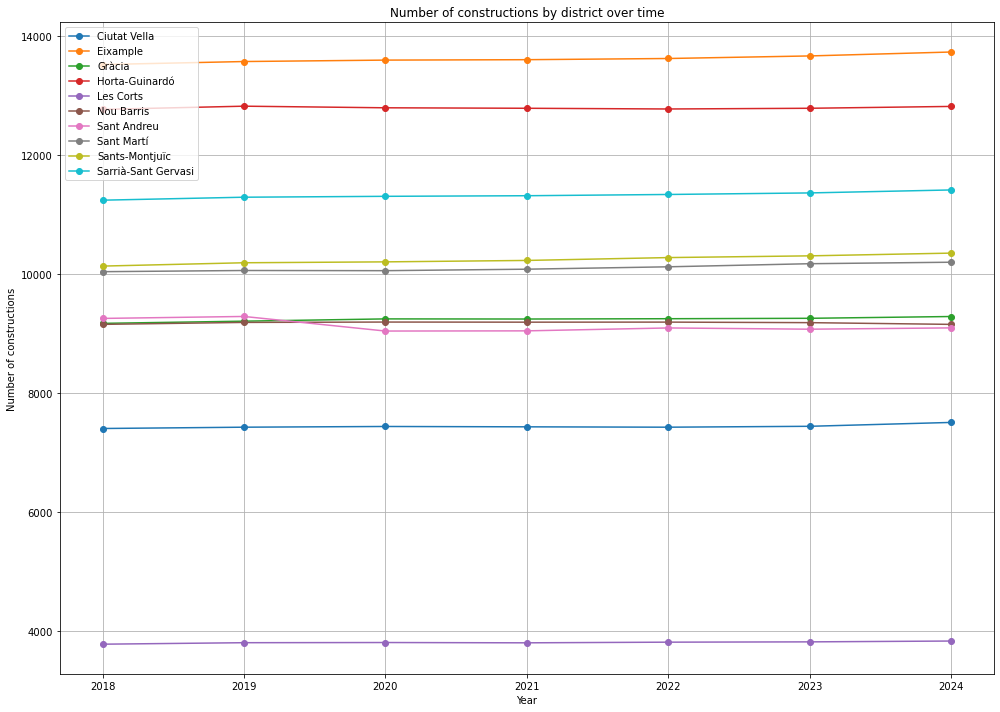

In [15]:
#for district: 

construction_by_year_and_district = df_constructions.groupby(['Any', 'Nom_districte'])['Nombre'].sum().unstack()

x_values = np.array(construction_by_year_and_district.index)

plt.figure(figsize=(14, 10))
for district in construction_by_year_and_district.columns:
    y_values = np.array(construction_by_year_and_district[district])
    plt.plot(x_values, y_values, marker='o', label=district)

plt.title('Number of constructions by district over time')
plt.xlabel('Year')
plt.ylabel('Number of constructions')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 2160x1440 with 0 Axes>

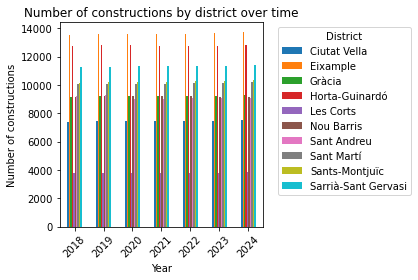

In [16]:
construction_by_district_year = df_constructions.groupby(['Nom_districte', 'Any'])['Nombre'].sum()

construction_by_district_year = construction_by_district_year.unstack(level=0)

plt.figure(figsize=(30, 20))
construction_by_district_year.plot(kind='bar', stacked=False)
plt.title('Number of constructions by district over time')
plt.xlabel('Year')
plt.ylabel('Number of constructions')
plt.xticks(rotation=45)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
